# Portrait plot using Matplotlib 

- Generate a static image of Portrait plot (with or without triangles) using Matplotlib.
- Author: Jiwoo Lee (2021.07)
- Last update: 2021.08

## 1. Read data from JSON files

Input data is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

In [1]:
import numpy as np
import glob
import json
import pandas as pd
import os


def get_units(var, results_dict_var):
    model_list = sorted(list(results_dict_var['RESULTS'].keys()))
    units = results_dict_var['RESULTS'][model_list[0]]["units"]
    return units


def get_data(results_dict, var_list, region, stat, season, mip):
    try:
        model_list = sorted(list(results_dict['rlut']['RESULTS'].keys()))
    except:
        model_list = sorted(list(results_dict[var_list[0]]['RESULTS'].keys()))
    
    data_list = []
    index = 1
    for model in model_list:
        try:
            run_list = list(results_dict['rlut']['RESULTS'][model]['default'].keys())
        except:
            run_list = list(results_dict[var_list[0]]['RESULTS'][model]['default'].keys())
            
        run_list.remove('source')
        for run in run_list:
            tmp_list = []
            for var in var_list:
                try:
                    tmp = float(results_dict[var]['RESULTS'][model]['default'][run][region][stat][season])
                except:
                    tmp = None
                tmp_list.append(tmp)
            data_list.append([index, mip, model, run, model+'_'+run] + tmp_list)
            index += 1

    data_list_column_names = ['index', 'mip', 'model', 'run', 'model_run'] + var_list

    # Convert data in pythin dict to pandas dataframe format
    df = pd.DataFrame(columns=data_list_column_names, data=data_list)
    return df

In [2]:
mip = 'cmip6'
data_version = "v20201008"
json_dir = '/Users/lee1043/Documents/Research/PMP/mean_climate/json_files/'

json_list = glob.glob(os.path.join(json_dir, '*' + mip + '*' + data_version + '.json'))
var_list = sorted([p.split('/')[-1].split('.')[0] for p in json_list])

# Simple re-order variables
try:
    var_list.remove('zg-500')
    idx_sfcWind = var_list.index('sfcWind')
    var_list.insert(idx_sfcWind+1, 'zg-500')
    print('var_list: ', var_list)
except:
    pass

# Overwrite variable list ...
var_list = ["pr", "psl", "rltcre", "rlut", "rstcre", "rsut", "ta-200", "ta-850", "tas", "ts",
            "ua-200", "ua-850", "va-200", "va-850", "zg-500"]

results_dict = {}  # merged dict by reading all JSON files
units_list = []

for var in var_list:
    json_file = os.path.join(json_dir, 
                             var + '.' + mip + '.historical.regrid2.2p5x2p5.' + data_version + '.json')
    #print(var, ':', json_file)
    with open(json_file) as fj:
        results_dict[var] = json.load(fj)
    units_list.append(get_units(var, results_dict[var]))

units_description_list = []
for var, units in zip(var_list, units_list):
    if var == "pr":
        units_description_list.append(var + " [mm d-1]")
    else:
        units_description_list.append(var + " ["+units+"]")

units_description_string = "Units: " + ", ".join(units_description_list)
print("Units:", units_description_list)

var_list:  ['pr', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rstcre', 'rsus', 'rsut', 'rsutcs', 'sfcWind', 'zg-500', 'ta-200', 'ta-850', 'tas', 'ts', 'ua-200', 'ua-850', 'uas', 'va-200', 'va-850', 'vas']
Units: ['pr [mm d-1]', 'psl [Pa]', 'rltcre [W m-2]', 'rlut [W m-2]', 'rstcre [W m-2]', 'rsut [W m-2]', 'ta-200 [K]', 'ta-850 [K]', 'tas [K]', 'ts [K]', 'ua-200 [m s-1]', 'ua-850 [m s-1]', 'va-200 [m s-1]', 'va-850 [m s-1]', 'zg-500 [m]']


In [3]:
#stats = ['rms_xyt', 'rms_xy', 'rmsc_xy', 'cor_xy', 'bias_xy']  # problem with cor_xy
stats = ['rms_xyt', 'rms_xy', 'rmsc_xy', 'bias_xy']
regions = ['global', 'TROPICS', 'NHEX', 'SHEX']

df_dict = {}
grid_dict = {}
seasons = {}

for stat in stats:
    df_dict[stat] = {}
    grid_dict[stat] = {}

    if stat in ['rms_devzm', 'rms_xyt', 'rms_y', 'std-obs_xy_devzm', 'std-obs_xyt', 'std_xy_devzm', 'std_xyt']:
        seasons[stat] = ['ann']
    else:
        seasons[stat] = ['djf', 'mam', 'jja', 'son']
        
    for season in seasons[stat]:
        df_dict[stat][season] = {}
        grid_dict[stat][season] = {}
        for region in regions:
            #print(stat, season, region)
            df_dict[stat][season][region] = get_data(results_dict, var_list, region, stat, season, mip) 

In [4]:
df_dict['rms_xy']['djf']['global']

,index,mip,model,run,model_run,pr,psl,rltcre,rlut,rstcre,rsut,ta-200,ta-850,tas,ts,ua-200,ua-850,va-200,va-850,zg-500
0,1,cmip6,ACCESS-CM2,r1i1p1,ACCESS-CM2_r1i1p1,1.655,251.612,8.531,11.011,12.733,13.657,2.731,1.336,2.279,2.571,4.084,1.371,1.502,0.759,22.140
1,2,cmip6,ACCESS-ESM1-5,r1i1p1,ACCESS-ESM1-5_r1i1p1,1.764,218.539,7.374,10.906,16.314,16.040,2.600,1.312,2.035,2.191,3.298,1.435,1.692,0.855,32.504
2,3,cmip6,AWI-ESM-1-1-LR,r1i1p1,AWI-ESM-1-1-LR_r1i1p1,1.935,211.132,8.937,11.649,14.634,15.867,NaN,NaN,1.880,2.217,4.037,1.741,2.291,1.038,NaN
3,4,cmip6,BCC-CSM2-MR,r1i1p1,BCC-CSM2-MR_r1i1p1,1.691,226.331,7.358,9.968,15.143,15.611,NaN,NaN,2.557,2.400,NaN,NaN,NaN,NaN,NaN
4,5,cmip6,BCC-ESM1,r1i1p1,BCC-ESM1_r1i1p1,1.601,248.693,8.406,12.735,19.643,19.242,4.342,1.916,3.069,2.998,4.574,1.860,2.000,1.090,NaN
5,6,cmip6,CAMS-CSM1-0,r1i1p1,CAMS-CSM1-0_r1i1p1,1.667,173.883,8.405,11.516,16.493,17.271,NaN,NaN,3.269,3.661,NaN,NaN,NaN,NaN,NaN
6,7,cmip6,CESM2,r1i1p1,CESM2_r1i1p1,1.222,202.799,6.975,7.892,13.036,12.563,2.025,1.172,1.446,1.824,3.130,1.398,1.763,0.758,NaN
7,8,cmip6,CESM2-FV2,r1i1p1,CESM2-FV2_r1i1p1,1.375,235.556,7.822,8.717,14.832,14.769,2.949,1.790,1.796,2.116,3.950,2.119,2.055,0.960,NaN
8,9,cmip6,CESM2-WACCM,r1i1p1,CESM2-WACCM_r1i1p1,1.205,204.362,6.743,7.656,13.944,13.097,NaN,NaN,1.358,1.720,2.988,1.555,1.582,0.755,NaN
9,10,cmip6,CESM2-WACCM-FV2,r1i1p1,CESM2-WACCM-FV2_r1i1p1,1.502,190.828,7.872,9.241,15.588,15.521,2.979,1.658,1.689,2.105,2.882,1.916,1.780,0.870,NaN


In [5]:
data_djf = df_dict['rms_xy']['djf']['global'][var_list].to_numpy()
data_mam = df_dict['rms_xy']['mam']['global'][var_list].to_numpy()
data_jja = df_dict['rms_xy']['jja']['global'][var_list].to_numpy()
data_son = df_dict['rms_xy']['son']['global'][var_list].to_numpy()
model_names = df_dict['rms_xyt']['ann']['global']['model'].tolist()
data_all = np.stack([data_djf, data_mam, data_jja, data_son])
print('data.shape:', data_all.shape)
print('len(var_list): ', len(var_list))
print('len(model_names): ', len(model_names))

xaxis_labels = var_list
yaxis_labels = model_names

data.shape: (4, 40, 15)
len(var_list):  15
len(model_names):  40


In [6]:
def normalize_by_median(data):
    """
    Parameters
    ----------
    data: 2d numpy array
    
    Return
    ------
    data_nor: 2d numpy array
    """
    
    median = np.nanmedian(data, axis=0)
    data_nor = (data - median) / median
    return data_nor

In [7]:
print(data_djf.shape)
median_djf = np.nanmedian(data_djf, axis=0)
median_djf.shape

(40, 15)


(15,)

In [8]:
data_djf_nor = normalize_by_median(data_djf)
data_mam_nor = normalize_by_median(data_mam)
data_jja_nor = normalize_by_median(data_jja)
data_son_nor = normalize_by_median(data_son)

In [9]:
data_all_nor = np.stack([data_djf_nor, data_mam_nor, data_jja_nor, data_son_nor])
data_all_nor.shape

(4, 40, 15)

## 2. Matplotlib Functions

In [10]:
from portrait_plot import portrait_plot

<p id="parameters"></p>

Parameters
----------
- `data`: 2d numpy array, a list of 2d numpy arrays, or a 3d numpy array (i.e. stacked 2d numpy arrays)
- `xaxis_labels`: list of strings, labels for xaixs. Number of list element must consistent to x-axis, or 0 (empty list) to turn off xaxis tick labels
- `yaxis_labels`: list of strings, labels for yaxis. Number of list element must consistent to y-axis, or 0 (empty list) to turn off yaxis tick labels
- `fig`: [`matplotlib.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `annotate`: bool, default=False, add annotating text if true, but work only for heatmap style map (i.e., no triangles)
- `annotate_data`: 2d numpy array, default=None. If None, the image's data is used.  Optional. 
- `annotate_fontsize`: number (int/float), default=15. Font size for annotation
- `figsize`: tuple of two numbers, default=(12, 10), figure size
- `vrange`: tuple of two numbers, default=(-3, 3), range of value for colorbar
- `xaxis_fontsize`: number, default=15, font size for xaxis tick labels
- `yaxis_fontsize`: number, default=15, font size for yaxis tick labels
- `cmap`: string, default="RdBu_r", name of matplotlib colormap
- `cbarlabel`: string, default=None, label for colorbar
- `cbar_label_fontsize`: number, default=15, font size for colorbar labels
- `cbar_tick_fontsize`: number, default=12, font size for colorbar tick labels
- `cbar_kw`: A dictionary with arguments to [`matplotlib.Figure.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).  Optional.
- `missing_color`: color, default="grey", [`matplotlib.axes.Axes.set_facecolor`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html) parameter
- `invert_yaxis`: bool, default=True, place y=0 at top on the plot
- `box_as_square`: bool, default=False, make each box as square
- `debug`: bool, default=False, if true print more message when running that help debugging

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis
- `cbar`: matplotlib component for colorbar

## 3. Plot

## 3.1 Portrait Plot with 4 Triangles (4 seasons)

- data order is clockwise from top: top, right, bottom, left

In [11]:
from portrait_plot import add_legned_4triangels

Text(0.5, 1.0, 'Seasonal climatology RMSE')

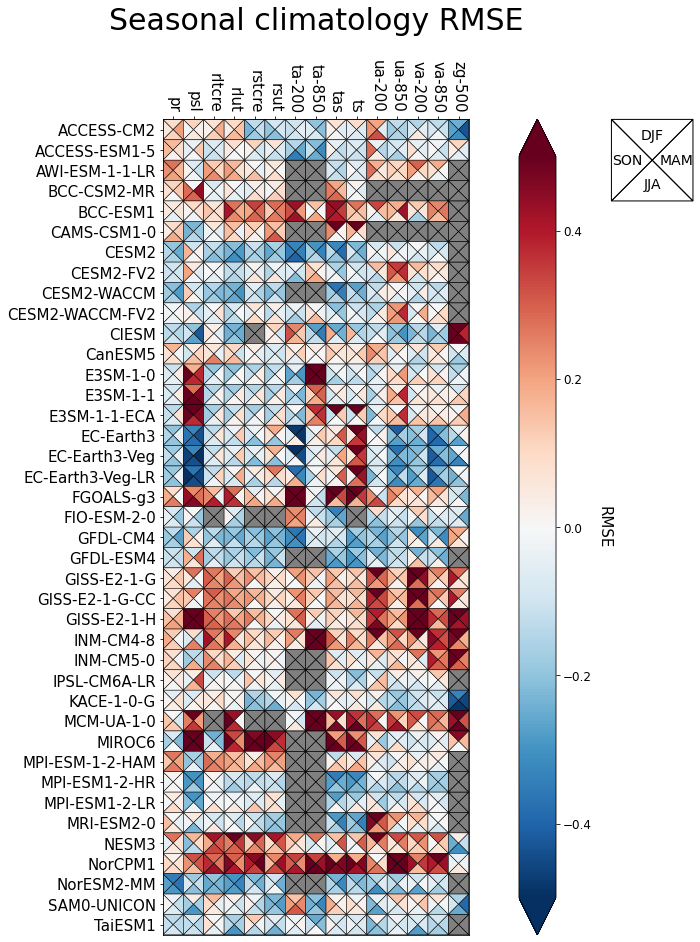

In [12]:
fig, ax, cbar = portrait_plot(data_all_nor,
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbarlabel='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(18, 15),
                              cbar_kw={"extend": "both"},
                              missing_color='grey'
                             )
ax.set_xticklabels(xaxis_labels, rotation=-90, va='center', ha="right")

# Add legend
box_x, box_y, box_size = 22, 0, 4
ax = add_legned_4triangels(ax, box_x, box_y, box_size, labels=['DJF', 'MAM', 'JJA', 'SON'])

# Add title
ax.set_title("Seasonal climatology RMSE", fontsize=30, pad=30)

## 3.3 Portrait Plot with 2 Triangles (2 seasons)

In [13]:
from portrait_plot import add_legned_2triangels

Text(0.5, 1.0, 'Seasonal climatology RMSE')

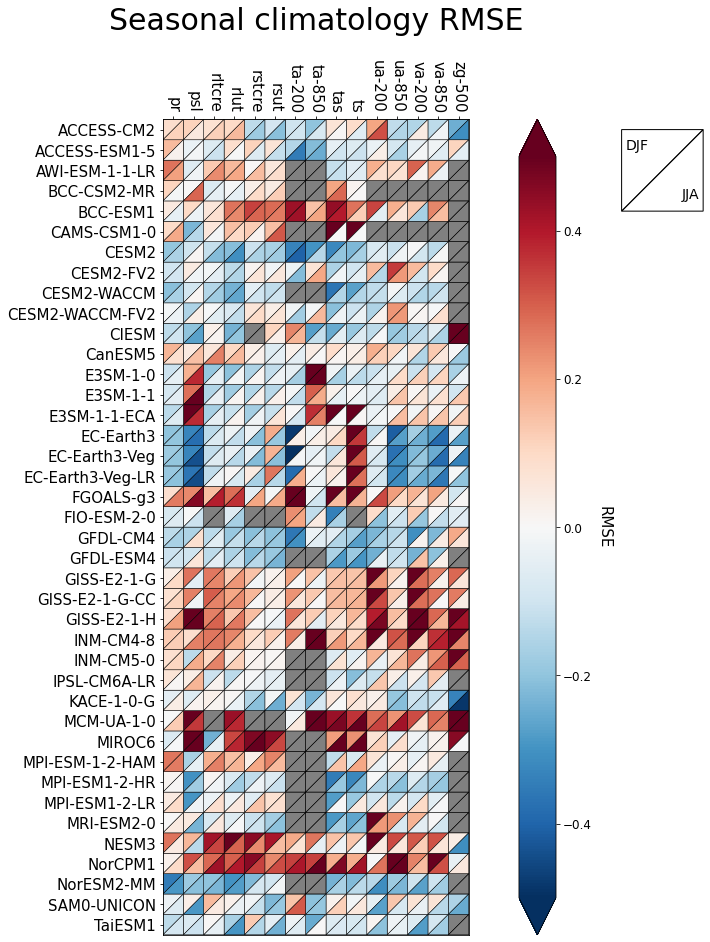

In [14]:
fig, ax, cbar = portrait_plot([data_djf_nor, data_jja_nor],
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbarlabel='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(18, 15),
                              cbar_kw={"extend": "both"},
                              missing_color='grey'
                             )
ax.set_xticklabels(xaxis_labels, rotation=-90, va='center', ha="right")

# Add legend
box_x, box_y, box_size = 22, 0, 4
ax = add_legned_2triangels(ax, box_x, box_y, box_size, labels=['DJF', 'JJA'])

# Add title
ax.set_title("Seasonal climatology RMSE", fontsize=30, pad=30)

## 3.3 Portrait Plot without Triangles (1 season)

Text(0.5, 1.0, 'Seasonal climatology RMSE: DJF')

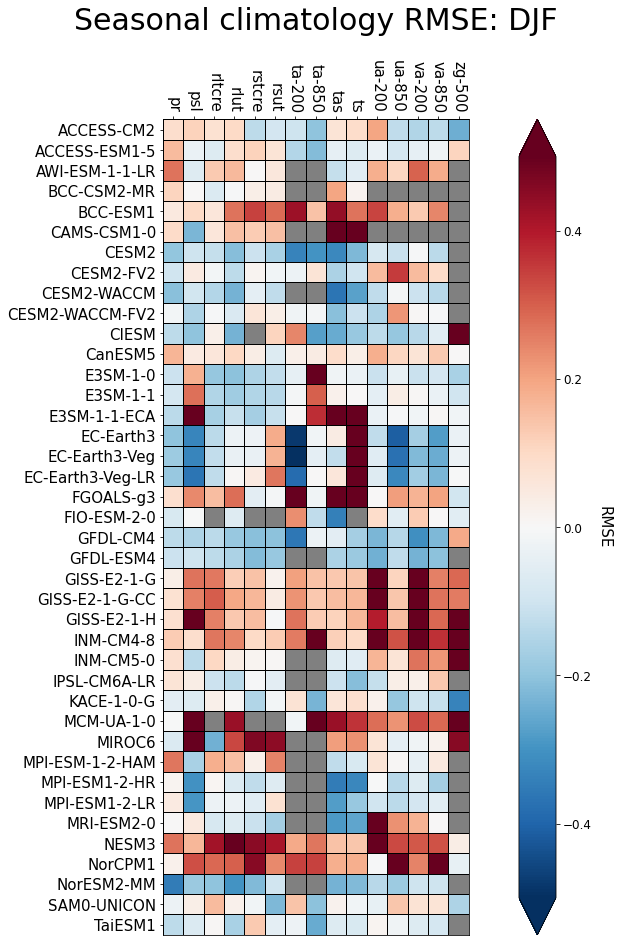

In [15]:
fig, ax, cbar = portrait_plot([data_djf_nor],
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbarlabel='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(18, 15),
                              cbar_kw={"extend": "both"},
                              missing_color='grey'
                             )
ax.set_xticklabels(xaxis_labels, rotation=-90, va='center', ha="right")

# Add title
ax.set_title("Seasonal climatology RMSE: DJF", fontsize=30, pad=30)